# Integration: How big are objects in the Universe?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In cosmology, the angular diameter distance defines the distance to an object in terms of the angular size of the object as viewed from Earth. In other words, the size of an object on the sky depends on its distance. In a non-Euclidean space, space is expanding, and its expansion is affected by the matter in it. So, the geometry of the Universe can be considered a competition between the expansion rate and gravity.

The expansion rate today is referred to as Hubble's constant, $H_o \approx 70 \frac{km}{s*Mpc}$ ($1 Mpc = 10^6 parasec = 3.09 x 10^{22} m$). For example, objects at a distance of 100 Mpc appear to be moving away from us at 7000 km/s on average.

The expansion rate at earlier epochs, (a period of time in history or a person's life, typically one marked by notable events or particular characteristics), in the Universe can be expressed in terms of the cosmological redshift of that epoch relative to us--i.e., how much the wavelength of light is strecthed by the expansion of the Universe since it was emitted.

$z = \frac{(\lambda_{observerd} - \lambda_{emitted})}{\lambda_{emitted}}$  Redshift (Doppler effect for light)

$z = 0$ relates to today, whereas $z = \infty$ relates to the moment of the Big Bang.

$H_o = 3.09*10^{22}$ m  Today's expansion rate (Hubble's Constant).

$H(z') = Ho*(0.3*(1+z')^3 + 0.7)^\frac{1}{2}$  Evolving expanssion rate.

$D_A(z) = \frac{1}{1+z} \int \frac{c}{H(z')dz'}$  Angular diameter distance in cosmology for a non Euclidean space.

In [2]:
# Define redshift array.
z_vals = np.arange(.25,10,.25)

def f(z):
     """
    Returns Hubble parameter (expansion rate).
    0.3 is the dimensionless matter density of the Universe.
    0.7 is the comological constant.
    
    Inputs: z
    """
    return (70.)*np.sqrt(0.3*(1+z)**3 + 0.7)

def Trapezoidal_Integration(a,n):
    """
    Manual tradezoidal integration in association with the angular diameter distance function.
    
    Inputs: a (start point of integration), n (number of trapezoids)
    """
    Area = []
    c = 3.0e5 #[km/s]

    for b in z_vals:
        width = b/n # a=0.
        summ = 0.5 * (1/f(a) + 1/f(b))

        for i in np.arange(1,n): # range(1,n) or n times, Left hand approximations.
            summ += 1/f(a+i*width) # f(a+i*width)
            
        Area.append(summ*width*c/(1+b))

    return Area

In [3]:
def Simpson_Integration(a,n):
    """
    Manual parabolic integration in association with the angular diameter distance function.
    
    Inputs: a (start point of integration), n (number of parabolas)
    """
    
    Area = []
    c = 3.00e5 # [km/s]

    for b in z_vals:
        
        h = b/n # for a = 0.
        summation = 1/f(a) + 1/f(b)

        # Odd Sums
        for i in range(1,n,2):
            summation += 4/f(a+i*h)

        # Even Sums
        for i in range(2,n,2):
            summation += 2/f(a+i*h)

        Area.append((h/3)*summation*c/(1 + b))

    return Area

In [4]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [5]:
def g_int(a,N):

    #number of points needed to integrate a degree n=4 polynomial
    #(satisfies n= 2N-1, rounded up to the next integer)
    Area = []
    c = 3.00e5
    
    for b in z_vals:

        # Calculate the sample points and weights,
        # then map them to the required integration domain
        x,w = gaussxw(N)
        xp = 0.5 * (b-a)*x + 0.5*(b+a)
        wp = 0.5 * (b-a)*w

        # Perform the integration
        s = 0
        for k in range(N):
            s += wp[k]/f(xp[k])
        Area.append(s * c/ (1 + b))
    return Area

**numpy.trapz(y, x=None, dx=1.0, axis=-1)**

Integrate along the given axis using the composite trapezoidal rule.

Integrate y (x) along given axis.

**Parameters**

y : array_like
Input array to integrate.

x : array_like, optional
The sample points corresponding to the y values. If x is None, the sample points are assumed to be evenly spaced dx apart. The default is None.

dx : scalar, optional
The spacing between sample points when x is None. The default is 1.

axis : int, optional
The axis along which to integrate.

**Returns**

trapzfloat
Definite integral as approximated by trapezoidal rule.

In [6]:
# Playing with scipy's trapz function.
import scipy.integrate as py
    
x1 = np.linspace(0,2,1000)
y = x1**2
s = py.trapz(y,x1)
print(s)
# (x**3)/3 from 2 to 0 is 2.6666666666666665

2.666668002670672


In [7]:
# Passing in a function in a function.
def trapz(function,n):
     """
    Numpy's tradezoidal integration in association with the angular diameter distance function..
    
    Inputs: function, n (number of trapezoids)
    """
    
    c = 3.0e5
    Area = []

    for b in z_vals:
        width = b/n
        x = np.arange(0,b+width,width)
        s = py.trapz(1/function(x),x)
        Int = s*c/(1+b)
        Area.append(Int)

    return Area

In [13]:
# Calculate the relative error with respect to Gaussian Quadrature. 
# (n=100 for trapezoidal & simpson's integration; GQ,n = 10)

data_trap = np.array(Trapezoidal_Integration(0,100))
data_simp = np.array(Simpson_Integration(0,100))
data_g = np.array(g_int(0,7))
data_nptrap = np.array(trapz(f,100))

erel_trap = np.abs(data_g - data_trap) / data_g
erel_simp = np.abs(data_g - data_simp) / data_g
erel_nptrap = np.abs(data_g - data_nptrap) / data_g

#results
print("\nAngular diameter distance at z = 10:\n")
print("Trapezoid rule: {} Mpc".format(np.round(data_trap[-1],3)))
print("Simpson's rule: {} Mpc".format(np.round(data_simp[-1],3)))
print("Numpy trapz rule: {} Mpc\n".format(np.round(data_nptrap[-1],3)))
print("For n = 100 for all integrals except the Gaussian Quad., \nthe relative Integration errors compared to the Gauss Quadrature is:")
print("Trapezoidal Integral is {}.".format(np.round(erel_trap.max(),7)))
print("Simpson's Integral is {}.".format(np.round(erel_simp.max(),8)))
print("Numpy's Trapezoidal Integral is {}.".format(np.round(erel_nptrap.max(),8)))


Angular diameter distance at z = 10:

Trapezoid rule: 873.841 Mpc
Simpson's rule: 873.701 Mpc
Numpy trapz rule: 873.841 Mpc

For n = 100 for all integrals except the Gaussian Quad., 
the relative Integration errors compared to the Gauss Quadrature is:
Trapezoidal Integral is 0.0001709.
Simpson's Integral is 5.168e-05.
Numpy's Trapezoidal Integral is 0.00335127.


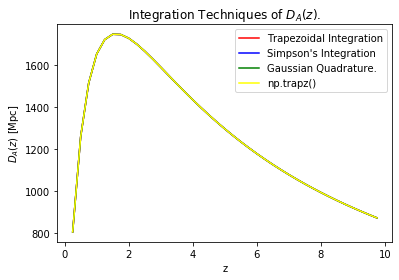

In [10]:
plt.figure()
plt.plot(z_vals,Trapezoidal_Integration(0,100**2),label='Trapezoidal Integration',color='Red')
plt.plot(z_vals,Simpson_Integration(0,100**2),label="Simpson's Integration",color='Blue')
plt.plot(z_vals,g_int(0,10),label='Gaussian Quadrature.',color='green')
plt.plot(z_vals,trapz(f,100**2),label='np.trapz()',color='yellow')
plt.title('Integration Techniques of $D_A(z)$.')
plt.ylabel('$D_A(z)$ [Mpc]')
plt.xlabel('z')
plt.legend()
plt.show()

In [11]:
# Calculate the relative error with respect to Gaussian Quadrature.
# (n=100**2 for trapezoidal & simpson's integration; GQ,n = 7)

data_trap = np.array(Trapezoidal_Integration(0,100**2))
data_simp = np.array(Simpson_Integration(0,100**2))
data_g = np.array(g_int(0,7))
data_nptrap = np.array(trapz(f,100**2))

erel_trap = np.abs(data_g - data_trap) / data_g
erel_simp = np.abs(data_g - data_simp) / data_g
erel_nptrap = np.abs(data_g - data_nptrap) / data_g

print("For n = 100**2 for for all integrals except the Gaussian Quad, \nthe relative Integration errors compared to Gauss Quadrature is:")
print("Trapezoidal Integral is {}.".format(np.round(erel_trap.max(),8)))
print("Simpson's Integral is {}.".format(np.round(erel_simp.max(),8)))
print("Numpy's Trapezoidal Integral is {}.".format(np.round(erel_nptrap.max(),8)))

For n = 100**2 for for all integrals except the Gaussian Quad, 
the relative Integration errors compared to Gauss Quadrature is:
Trapezoidal Integral is 5.183e-05.
Simpson's Integral is 5.182e-05.
Numpy's Trapezoidal Integral is 7.982e-05.


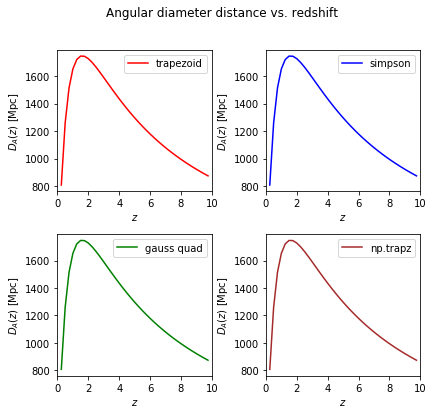

In [12]:
# Plot the results with subplots.
fig = plt.figure(figsize=(6,6))
xlbl='$z$'
ylbl=r'$D_A(z)$ [Mpc]'

ax1=fig.add_subplot(221)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.xlim(0,10)
p1,=ax1.plot(z_vals, data_trap,color='r')
ax1.legend((p1,),('trapezoid',))

ax2=fig.add_subplot(222)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.xlim(0,10)
p2,=ax2.plot(z_vals, data_simp,color='b')
ax2.legend((p2,),('simpson',))

ax3=fig.add_subplot(223)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.xlim(0,10)
p3,=ax3.plot(z_vals, data_g,color='g')
ax3.legend((p3,),('gauss quad',))

ax4=fig.add_subplot(224)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.xlim(0,10)
p4,=ax4.plot(z_vals, data_nptrap,color='brown')
ax4.legend((p4,),('np.trapz',))

fig.subplots_adjust(hspace=0.3,wspace=0.35,left=0.12,right=0.96)
fig.suptitle('Angular diameter distance vs. redshift')
plt.savefig('D_A_compare.pdf')